## Curve Fitting

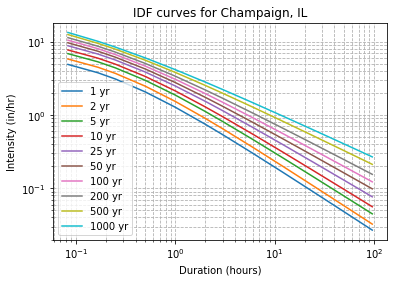

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def idf(t,a,n,c):
    '''
    Chow et al IDF relationship
    '''
    return a/((t**n)+c)

#Get data
data = np.loadtxt('../data/idf.csv',skiprows=1,dtype=np.float,delimiter=',')
period = data[0,1:] #return period in years
duration = data[1:,0] #duration in hr
intensity = data[1:,1:] #intensity in in/hr

#Fit curves
popt = [] #optimized parameters
pcov = [] #covariance matrices

for i in range(len(period)):
    p = curve_fit(idf,duration,intensity[:,i])
    popt.append(p[0])
    pcov.append(p[1])
    
    plt.loglog(duration,idf(duration,p[0][0],p[0][1],p[0][2]),label=str(int(period[i]))+' yr')

plt.xlabel('Duration (hours)')
plt.ylabel('Intensity (in/hr)')
plt.title('IDF curves for Champaign, IL')
plt.grid(which='both',linestyle='--')
plt.legend()
plt.show()

## Image Processing

In [ ]:
from scipy.ndimage import gaussian_filter, rotate, sobel

img = plt.imread('../data/otter.png')
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')

img_rotate = rotate(img,angle=10)
plt.subplot(2,2,2)
plt.imshow(img_rotate,cmap='gray')
plt.axis('off')

img_filter = gaussian_filter(img_rotate,sigma=3)
img_sharp = img_rotate + 30.*(img_rotate-img_filter)
plt.subplot(2,2,3)
plt.imshow(img_sharp,cmap='gray')
plt.axis('off')

sx = sobel(img_sharp, axis=0)
sy = sobel(img_sharp, axis=1)
img_sobel = np.hypot(sx,sy)
plt.subplot(2,2,4)
plt.imshow(img_sobel,cmap='gray')
plt.axis('off')

plt.show()

## Fast Fourier Transform

In [ ]:
from scipy.fftpack import fft
t,sig = np.loadtxt('../data/cat.csv',unpack=True,skiprows=1,dtype=np.float,delimiter=',')

plt.subplot(2,1,1)
plt.plot(t,sig)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

spec = fft(sig)
T = t[1]-t[0]
N = sig.size
freq = np.linspace(0,1.0/T,N)
plt.subplot(2,1,2)
plt.plot(freq[:N//2]/1000.,np.abs(spec)[:N//2]*1.0/np.max(np.abs(spec)))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')
plt.grid()

plt.show()